# Урок 2. Метрики качества классификации ч.1

В уроке мы разбирали матрицу ошибок и некоторые метрики, основанные на терминах матрицы ошибок. Здесь же посмотрим, как эти метрики применять на практике и что  по ним можно выяснить.

### 1.1
Выкачайте тренировочный датасет Titanic - train.csv - с сайта [kaggle](https://www.kaggle.com/c/titanic/data). С помощью функции pd.read_csv() загрузите данные в датафрейм. Выведите первые 20 строк и проанализируйте данные: какие колонки присутствуют (более конкретная информация по ним есть на сайте kaggle), каким образом в них обозначены данные и какие типы данных используются (используйте pandas.dtypes). 

In [2]:
import pandas as pd

In [3]:
### YOUR CODE HERE ###
df = pd.read_csv("./data/train.csv")
df[:20]



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### 1.2
Проверьте, имеются ли пропущенные значения в колонках, и выведите сумму всех пропущенных значений в каждой из колонок.

In [4]:
### YOUR CODE HERE ###
{c: len(df[df[c].isnull()]) for c in df.columns}

{'PassengerId': 0,
 'Survived': 0,
 'Pclass': 0,
 'Name': 0,
 'Sex': 0,
 'Age': 177,
 'SibSp': 0,
 'Parch': 0,
 'Ticket': 0,
 'Fare': 0,
 'Cabin': 687,
 'Embarked': 2}

### 1.3
Замените все пропущенные значения колонки Age на медианы в зависимости от пола человека: т.е. если пол человека в строке с пропущенным значением "male", заменяете пропущенное значение возраста на медиану по всем известным возрастам мужчин, и наоборот. Выведите медианы возраста в зависимости от пола. Пропущенные значения колонок Cabin и Embarked замените на U (Unknown).

Примечание: для группировки по полу можно использовать метод df.groupby(), который имеет встроенные агрегатные функции (в т.ч. для вычисления медианы).  Для установки пропущенных значений в датасете воспользуйтесь функцией df.apply().

In [5]:
### YOUR CODE HERE ###
import numpy as np
men_median = np.median(df[(df["Sex"] == "male") & df["Age"].notna()]["Age"].values)
women_median = np.median(df[(df["Sex"] == "female") & df["Age"].notna()]["Age"].values)

def replace_median(x):
    if pd.isna(x["Age"]):
        return men_median if x["Sex"] == "male" else women_median
    else:
        return x["Age"]

print(men_median, women_median)

df["Age"] = df.apply(lambda x: replace_median(x), axis=1)
df["Cabin"] = df["Cabin"].fillna("U")
df["Embarked"] = df["Embarked"].fillna("U")
df[:20]

29.0 27.0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S
5,6,0,3,"Moran, Mr. James",male,29.0,0,0,330877,8.4583,U,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,U,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,U,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,U,C


### 1.4
Выведите возраст пассажиров с PassengerID = [6, 20]. Убедитесь, что заполнены все пропущенные значения (воспользуйтесь функцией df.isnull() ).

In [6]:
### YOUR CODE HERE ###

df[df["PassengerId"].isin([6, 20])]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,29.0,0,0,330877,8.4583,U,Q
19,20,1,3,"Masselmani, Mrs. Fatima",female,27.0,0,0,2649,7.2250,U,C


Так как не все классификаторы могут работать с категориальными признаками, в данном случае необходимо заменить их на числовые.

Также можно было бы выделить расширенные признаки, такие как статус пассажира (Mr., Mrs., Miss., Dr., Master. и т.д.), собственный индекс билета, индекс палубы и другие, но здесь ограничимся выбором более простых признаков.

### 1.5
В колонке Sex замените значения на 0, если пол "male", и на 1, если "female". В колонке Embarked замените параметры "U", "S", "C", "Q" на 0, 1, 2, 3 соответственно. Отбросьте колонки PassengerId, Name, Ticket, Cabin. Выведите первые 20 строк получившегося набора данных.

In [7]:
### YOUR CODE HERE ###
t_sex = {"male": 0, "female": 1}
t_embarked = {"U": 0, "S": 1, "C": 2, "Q": 3}
df["Sex"] = df["Sex"].apply(lambda x: t_sex[x])
df["Embarked"] = df["Embarked"].apply(lambda x: t_embarked[x])

df1 = df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])

df1[:20]


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1
1,1,1,1,38.0,1,0,71.2833,2
2,1,3,1,26.0,0,0,7.9250,1
3,1,1,1,35.0,1,0,53.1000,1
4,0,3,0,35.0,0,0,8.0500,1
5,0,3,0,29.0,0,0,8.4583,3
6,0,1,0,54.0,0,0,51.8625,1
7,0,3,0,2.0,3,1,21.0750,1
8,1,3,1,27.0,0,2,11.1333,1
9,1,2,1,14.0,1,0,30.0708,2


### 1.6
Приступим к построению классификаторов. **Условимся, что, если функция или объект модели имеют параметр random_state, то устанавливаем его равным 17 в каждом из случаев.**

Разделите данные на тренировочный и тестовый датасеты, установив размер тестового как 0.25 (первая колонка Survived является целевой, поэтому необходимо сначала ее отделить от признаков).

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
### YOUR CODE HERE ###
Y = df1["Survived"]
X = df1.drop(columns=["Survived"])
Xt,Xv,Yt,Yv = train_test_split(X,Y,test_size=0.25, random_state=17)

Xt[:5], Yt[:5]


(     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
 407       2    0   3.0      1      1  18.7500         1
 176       3    0  29.0      3      1  25.4667         1
 816       3    1  23.0      0      0   7.9250         1
 375       1    1  27.0      1      0  82.1708         2
 151       1    1  22.0      1      0  66.6000         1,
 407    1
 176    0
 816    0
 375    1
 151    1
 Name: Survived, dtype: int64)

### 1.7
Обучите на полученных выборках несколько классификаторов, которые импортированы ниже.

**Примечание: в методе ближайших соседей используйте количество соседей, равное 5.**

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [12]:
### YOUR CODE HERE ###
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(Xt, Yt)

nb = GaussianNB()
nb.fit(Xt, Yt)

dct = DecisionTreeClassifier()
dct.fit(Xt, Yt)

lr = LogisticRegression()
lr.fit(Xt, Yt)

LogisticRegression()

Очевидно, в этом случае использовать метрику accuracy, которую мы применяли до этого, не совсем правильно: она не даст верную оценку классификатору, потому как выживших явно меньше, чем погибших.

Вспомним про такие метрики как точность и полнота. Здесь они подойдут хорошо, так как у нас имеются положительный и отрицательный классы, и определить корректно один из них может оказаться более важным .

### 1.8
В каждом из пунктов следующего теста выберите, что важнее максимизировать: точность (precision) или полноту (recall). Выпишите ответы.

1. Вероятность того, что при определенной поломке самолета он сможет долететь до пункта назначения (1 - долетел, 0 - не долетел).
2. Предсказание, представляет ли человек опасность, по анализу психического состояния (1 - представляет опасность, 0 - не представляет опасности).
3. Предсказание ухода клиента (1 - клиент ушел, 0 - остался).
4. Выявление рака на основе медицинских показателей (1 - болен раком, 0 - здоров).
5. Предсказание летальности при наблюдаемой мутации (1 - выживание, 0 - летальный исход).
6. Определение важности происшествия для экстренных служб (1 - важно, 0 - неважно).
7. Окупятся ли вложения в бизнес (1 - окупятся, 0 - не окупятся).

Ваш ответ:

Все зависит от относительной цены FN, если показатель, который предсказывается жизненно важен, то лучше уменьшить частоту FN, т.е. повысить recall

1. recall, т.к. лучше уменьшить частоту ошибок II рода<br>
2. precision <br>
3. precision<br>
4. recall<br>
5. recall<br>
6. recall<br>
7. precision<br>

### 1.9
Определите, что важнее использовать в случае датасета Titanic: полноту или точность. Объясните, почему.

Ответ: recall, т.к. классы не равномерны, количесвто выживших меньше количества погибших?


### 1.10
Для каждого классификатора выведите матрицу ошибок и самостоятельно рассчитайте метрику recall (расчеты должны присутствовать). Проверьте расчеты, воспользовавшись встроенной метрикой recall_score.

In [13]:
from sklearn.metrics import confusion_matrix, recall_score

In [14]:
### YOUR CODE HERE ###
#
# [[TN, FP]
#  [FN, TP]]
#
print("KNN:")
c1 = confusion_matrix(Yv, knn.predict(Xv))
print(c1)
print("knn recall = ", c1[1][1] / (c1[1][0] + c1[1][1]), recall_score(Yv, knn.predict(Xv)))

print("NB:")
c2 = confusion_matrix(Yv, nb.predict(Xv))
print(c2)
print("nb recall = ", c2[1][1] / (c2[1][0] + c2[1][1]), recall_score(Yv, nb.predict(Xv)))

print("DCT:")
c3 = confusion_matrix(Yv, dct.predict(Xv))
print(c3)
print("dct recall = ", c3[1][1] / (c3[1][0] + c3[1][1]), recall_score(Yv, dct.predict(Xv)))

print("LR:")
c4 = confusion_matrix(Yv, lr.predict(Xv))
print(c4)
print("lr recall = ", c4[1][1] / (c4[1][0] + c4[1][1]), recall_score(Yv, lr.predict(Xv)))

KNN:
[[110  21]
 [ 47  45]]
knn recall =  0.4891304347826087 0.4891304347826087
NB:
[[111  20]
 [ 27  65]]
nb recall =  0.7065217391304348 0.7065217391304348
DCT:
[[111  20]
 [ 25  67]]
dct recall =  0.7282608695652174 0.7282608695652174
LR:
[[114  17]
 [ 28  64]]
lr recall =  0.6956521739130435 0.6956521739130435


### 1.11
Выберите ту модель, на которой метрика recall давала лучший ответ, и рассчитайте для нее precision, используя встроенную функцию.

In [15]:
from sklearn.metrics import precision_score

In [16]:
### YOUR CODE HERE ###
precision_score(Yv, dct.predict(Xv))



0.7701149425287356

### Урок 4.
Метрики качества классификации ч.2
Продолжим работу с метриками классификации. В предыдущем задании мы разобрали матрицу ошибок и две основные метрики, которые используются при бинарной классификации.

Сейчас рассмотрим F-меру - совокупную метрику по precision и recall - и более сложную AUC-ROC.

Из задания к предыдущему уроку выберите классификатор, который давал наименьшее значение recall, вычислите для него precision, применив precision_score, и самостоятельно посчитайте F1-меру (расчеты должны присутствовать). Затем проверьте ответ, используя встроенную функцию.

Сравните полученную f1-меру со значением среднего арифметического полноты и точности.

In [19]:
from sklearn.metrics import precision_score, f1_score

f1_score(Yv, knn.predict(Xv)), 0.5*(precision_score(Yv, knn.predict(Xv)) + recall_score(Yv, knn.predict(Xv)))
#отличается в меньшую сторону

(0.5696202531645569, 0.5854743083003953)

В библиотеке sklearn есть удобная функция classification_report, возвращающая precision, recall, F-меру и количество экземпляров каждого класса в удобном для чтения формате. Также существует функция precision_recall_fscore_support, возвращающая те же самые метрики, но в форме массива.

### 2.2
Для каждого классификатора из предыдущего урока рассчитайте и выведите следующие импортированные метрики.

In [21]:
from sklearn.metrics import precision_recall_fscore_support, classification_report

print(classification_report(Yv, knn.predict(Xv)))
print(precision_recall_fscore_support(Yv, knn.predict(Xv)))

print(classification_report(Yv, nb.predict(Xv)))
print(precision_recall_fscore_support(Yv, nb.predict(Xv)))

print(classification_report(Yv, dct.predict(Xv)))
print(precision_recall_fscore_support(Yv, dct.predict(Xv)))
print(classification_report(Yv, lr.predict(Xv)))
print(precision_recall_fscore_support(Yv, lr.predict(Xv)))

              precision    recall  f1-score   support

           0       0.70      0.84      0.76       131
           1       0.68      0.49      0.57        92

    accuracy                           0.70       223
   macro avg       0.69      0.66      0.67       223
weighted avg       0.69      0.70      0.68       223

(array([0.70063694, 0.68181818]), array([0.83969466, 0.48913043]), array([0.76388889, 0.56962025]), array([131,  92], dtype=int64))
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       131
           1       0.76      0.71      0.73        92

    accuracy                           0.79       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223

(array([0.80434783, 0.76470588]), array([0.84732824, 0.70652174]), array([0.82527881, 0.73446328]), array([131,  92], dtype=int64))
              precision    recall  f1-score   support

           0       0.82    

### 2.3 

1. Используя StratifiedKFold, разбейте данные для кросс-валидации по 5-ти блокам (не забывайте во всех методах использовать random_state=17).
2. С помощью numpy.logspace разбейте интервал (-1, 2) на 500 значений.
3. С помощью LogisticRegressionCV подберите оптимальный параметр C: установите гиперпараметр Cs равным объекту из п.2 (разбиение интервала (-1, 2) отвечает за подбор обратного коэффициента регуляризации C); cv равным объекту из п.1 (разбиение для кросс-валидации); scoring равным "roc_auc" (отвечает за оптимизацию гиперпараметров на кросс-валидации: метрика, установленная в scoring, контролирует, как оценивать модель при каждом из наборе параметров, т.е. показывает, какая метрика должна быть наилучшей).
4. Обучите полученную модель на тренировочных данных.

In [24]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegressionCV
import numpy as np

skf = StratifiedKFold(n_splits=5, random_state=17, shuffle=False) #Зачем его использоваеть, если он зашит внутри LogisticRegressionCV
skf.get_n_splits(Xt, Yt)

Cs = np.logspace(-1, -2, 500)
lr = LogisticRegressionCV(Cs, cv=5, scoring="roc_auc", random_state=17)
lr.fit(Xt, Yt)

C:\bin\anaconda\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass Cs=[0.1        0.09953962 0.09908137 0.09862522 0.09817117 0.09771921
 0.09726934 0.09682153 0.09637579 0.09593209 0.09549045 0.09505083
 0.09461324 0.09417766 0.09374409 0.09331251 0.09288292 0.09245531
 0.09202967 0.09160598 0.09118425 0.09076446 0.0903466  0.08993067
 0.08951665 0.08910453 0.08869432 0.08828599 0.08787954 0.08747496
 0.08707225 0.08667139 0.08627237 0.08587519 0.08547985 0.08508632
 0.0846946  0.08430468 0.08391656 0.08353023 0.08314568 0.08276289
 0.08238187 0.08200261 0.08162509 0.0812493  0.08087525 0.08050292
 0.0801323  0.07976339 0.07939618 0.07903066 0.07866682 0.07830465
 0.07794416 0.07758532 0.07722814 0.0768726  0.07651869 0.07616642
 0.07581576 0.07546673 0.07511929 0.07477346 0.07442922 0.07408657
 0.07374549 0.07340598 0.07306804 0.07273165 0.07239681 0.07206351
 0.07173175 0.07140151 0.0710728  0.07074559 0.0704199  0.0700957
 0.069773   0.06945178 0.06913204 0.06881

LogisticRegressionCV(Cs=array([0.1       , 0.09953962, 0.09908137, 0.09862522, 0.09817117,
       0.09771921, 0.09726934, 0.09682153, 0.09637579, 0.09593209,
       0.09549045, 0.09505083, 0.09461324, 0.09417766, 0.09374409,
       0.09331251, 0.09288292, 0.09245531, 0.09202967, 0.09160598,
       0.09118425, 0.09076446, 0.0903466 , 0.08993067, 0.08951665,
       0.08910453, 0.08869432, 0.08828599, 0.08787954, 0.087474...
       0.01143184, 0.01137921, 0.01132683, 0.01127468, 0.01122277,
       0.01117111, 0.01111968, 0.01106848, 0.01101753, 0.01096681,
       0.01091632, 0.01086606, 0.01081604, 0.01076624, 0.01071668,
       0.01066734, 0.01061823, 0.01056935, 0.01052069, 0.01047225,
       0.01042404, 0.01037605, 0.01032828, 0.01028073, 0.0102334 ,
       0.01018629, 0.01013939, 0.01009272, 0.01004625, 0.01      ]),
                     cv=5, random_state=17, scoring='roc_auc')

### 2.4
Используя метод plot из matplotlib.pyplot, выведите график зависимости auc_roc от значения C.

*Примечание: значения по оси x - разбиение с помощью np.logspace из п.2 предыдущего задания, а значения по оси y - среднее значение roc_auc по каждой валидации, т.е. среднее значение из полученных на каждом из 5-ти разбиений при данном параметре C (используйте метод scores_ объекта, который инкапсулирует LogisticRegressionCV).*

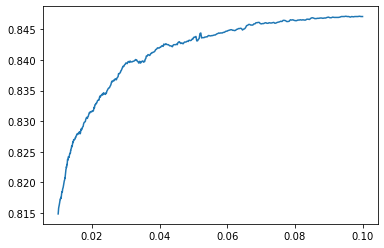

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

scores_avg = lr.scores_[1].mean(axis=0)

plt.plot(Cs, scores_avg)


In [40]:
lr.C_, Cs[:15]

(array([0.09908137]),
 array([0.1       , 0.09953962, 0.09908137, 0.09862522, 0.09817117,
        0.09771921, 0.09726934, 0.09682153, 0.09637579, 0.09593209,
        0.09549045, 0.09505083, 0.09461324, 0.09417766, 0.09374409]))

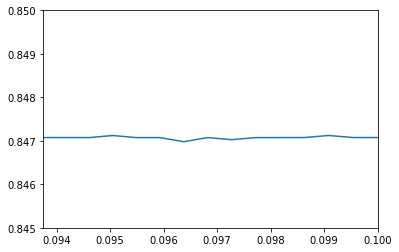

In [45]:
plt.xlim([0.09374409, 0.1])
plt.ylim([0.845, 0.85])
plt.plot(Cs, scores_avg)

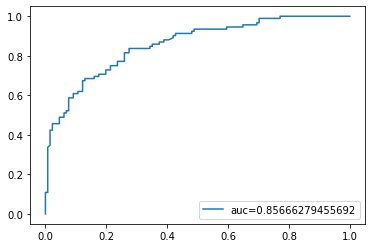

In [46]:
from sklearn.metrics import roc_auc_score, roc_curve
probas = lr.predict_proba(Xv)
fpr, tpr, _ = roc_curve(Yv, probas[:, 1])
auc = roc_auc_score(Yv, probas[:, 1])
plt.plot(fpr, tpr, label="auc=" + str(auc))
plt.legend(loc=4)